In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    closing_prices,
    optimize_portfolio,
    backtest_portfolio,
    evaluate_portfolio,
)

In [2]:
# 1: <Good Performance> Select Stocks For Inclusion in Portfolio
selected_stocks = ["AMZN","JPM","FCX","HAL","F"]

In [3]:
# 2: Optimize Portfolio Around List of Provided Stocks
portfolio = optimize_portfolio(selected_stocks)

[0] Retrieving Stock Data: AMZN
[1] Retrieving Stock Data: JPM
[2] Retrieving Stock Data: FCX
[3] Retrieving Stock Data: HAL
[4] Retrieving Stock Data: F

Optimizing Portfolio Weights >> Simulations: x 5000

Optimized Portfolio Weights:
AMZN        0.4794
F           0.0179
FCX         0.0069
HAL         0.0064
JPM         0.4895
Return      0.2179
Sharpe      0.5956
Variance    0.2013
Name: 4280, dtype: float64


In [4]:
# 3: Back-Test Performance of Optimized Portfolio Using Historical Data
performance = backtest_portfolio(portfolio)


Ticker: AMZN 	Portfolio Weight: 0.4794
                AMZN
Date                
2014-01-03 -0.001847
2014-01-06 -0.003410
2014-01-07  0.005329
2014-01-08  0.004662
2014-01-09 -0.001087

Ticker: F 	Portfolio Weight: 0.0179
                   F
Date                
2014-01-03  0.000081
2014-01-06  0.000081
2014-01-07 -0.000231
2014-01-08  0.000185
2014-01-09  0.000342

Ticker: FCX 	Portfolio Weight: 0.0069
                 FCX
Date                
2014-01-03 -0.000057
2014-01-06 -0.000056
2014-01-07 -0.000067
2014-01-08 -0.000087
2014-01-09 -0.000094

Ticker: HAL 	Portfolio Weight: 0.0064
                 HAL
Date                
2014-01-03  0.000015
2014-01-06  0.000024
2014-01-07 -0.000015
2014-01-08 -0.000090
2014-01-09  0.000014

Ticker: JPM 	Portfolio Weight: 0.4895
                 JPM
Date                
2014-01-03  0.003770
2014-01-06  0.002829
2014-01-07 -0.005674
2014-01-08  0.004595
2014-01-09 -0.000915

[Historic] Portfolio Performance:
                 AMZN         F     

In [5]:
# 4: Evaluate Portfolio Historic Performance Against Benchmark
pfolio_eval = evaluate_portfolio(performance)

                AMZN         F       FCX       HAL       JPM      RTNp  \
Date                                                                     
2014-01-03 -0.001847  0.000081 -0.000057  0.000015  0.003770  0.001962   
2014-01-06 -0.003410  0.000081 -0.000056  0.000024  0.002829 -0.000532   
2014-01-07  0.005329 -0.000231 -0.000067 -0.000015 -0.005674 -0.000659   
2014-01-08  0.004662  0.000185 -0.000087 -0.000090  0.004595  0.009265   
2014-01-09 -0.001087  0.000342 -0.000094  0.000014 -0.000915 -0.001740   

                RTNm    Excess       Compare  
Date                                          
2014-01-03  0.005026 -0.003064  Underperform  
2014-01-06 -0.021439  0.020907    Outperform  
2014-01-07  0.005109 -0.005769  Underperform  
2014-01-08 -0.005897  0.015163    Outperform  
2014-01-09 -0.005932  0.004193    Outperform  


In [6]:
# [View] Portfolio Evaluation Summary
pfolio_eval.head()

,AMZN,F,FCX,HAL,JPM,RTNp,RTNm,Excess,Compare
Date,,,,,,,,,
2014-01-03,-0.001847,0.000081,-0.000057,0.000015,0.003770,0.001962,0.005026,-0.003064,Underperform
2014-01-06,-0.003410,0.000081,-0.000056,0.000024,0.002829,-0.000532,-0.021439,0.020907,Outperform
2014-01-07,0.005329,-0.000231,-0.000067,-0.000015,-0.005674,-0.000659,0.005109,-0.005769,Underperform
2014-01-08,0.004662,0.000185,-0.000087,-0.000090,0.004595,0.009265,-0.005897,0.015163,Outperform
2014-01-09,-0.001087,0.000342,-0.000094,0.000014,-0.000915,-0.001740,-0.005932,0.004193,Outperform


In [7]:
# [View] Evaluation Sample Size
pfolio_eval.count()

AMZN       1063
F          1063
FCX        1063
HAL        1063
JPM        1063
RTNp       1063
RTNm       1063
Excess     1063
Compare    1063
dtype: int64

In [8]:
# [View] Portfolio/Market Performance Comparison Summary
round(pfolio_eval["Compare"].value_counts()/pfolio_eval["Compare"].count(), 4)

Outperform      0.5146
Underperform    0.4854
Name: Compare, dtype: float64

In [9]:
pfolio_eval["RTNp"].head(10)

Date
2014-01-03    0.001962
2014-01-06   -0.000532
2014-01-07   -0.000659
2014-01-08    0.009265
2014-01-09   -0.001740
2014-01-10   -0.005813
2014-01-13   -0.014958
2014-01-14    0.008835
2014-01-15    0.013045
2014-01-16   -0.004095
Name: RTNp, dtype: float64

In [10]:
xaxis_dates = pfolio_eval.reset_index()["Date"]
xmin = xaxis_dates.iloc[0]
xmax = xaxis_dates.iloc[-1]

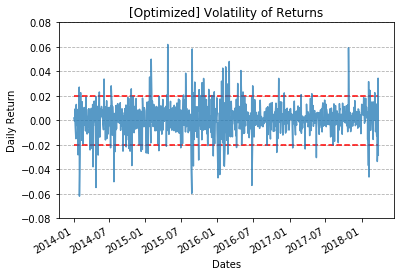

In [11]:
# [View] Volatility of Portfolio Returns
pfolio_eval["RTNp"].plot(alpha=.75)
plt.title("[Optimized] Volatility of Returns")
plt.xlabel("Dates")
plt.ylabel("Daily Return")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

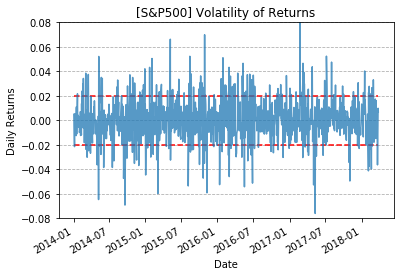

In [12]:
# [View] Volatility of Market Returns
pfolio_eval["RTNm"].plot(alpha=.75)
plt.title("[S&P500] Volatility of Returns")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

In [13]:
# Calculate Portfolio Beta -- Show The Correlation of Returns
# Explanation as to Why On an Absolute Basis Portfolio Underpeforms Only Slightly


In [14]:
rtn_df = pfolio_eval["RTNp"].apply(lambda x: x + 1).reset_index()

In [15]:
rtn_df.head()

,Date,RTNp
0,2014-01-03,1.001962
1,2014-01-06,0.999468
2,2014-01-07,0.999341
3,2014-01-08,1.009265
4,2014-01-09,0.998260


In [16]:
rtn_df.iloc[0]["Date"].date()

datetime.date(2014, 1, 3)

In [17]:
mkt_val = [(row[1][0].date(), row[1][1]) for row in rtn_df.iterrows()]

In [18]:
mkt_val[:10]

[(datetime.date(2014, 1, 3), 1.001962210800478),
 (datetime.date(2014, 1, 6), 0.9994680048138288),
 (datetime.date(2014, 1, 7), 0.9993405736972956),
 (datetime.date(2014, 1, 8), 1.0092654578828253),
 (datetime.date(2014, 1, 9), 0.9982602838152678),
 (datetime.date(2014, 1, 10), 0.9941865875109595),
 (datetime.date(2014, 1, 13), 0.9850424819963217),
 (datetime.date(2014, 1, 14), 1.0088346175309344),
 (datetime.date(2014, 1, 15), 1.0130452561087542),
 (datetime.date(2014, 1, 16), 0.9959049124313001)]

In [19]:
pfolio_eval.describe()

,AMZN,F,FCX,HAL,JPM,RTNp,RTNm,Excess
count,1063.000000,1063.000000,1063.000000,1.063000e+03,1063.000000,1063.000000,1063.000000,1063.000000
mean,0.000598,-0.000006,-0.000005,-3.111991e-07,0.000284,0.000870,0.000294,0.000576
std,0.008895,0.000256,0.000250,1.252565e-04,0.006429,0.012729,0.017077,0.018689
min,-0.055851,-0.001525,-0.001568,-7.355865e-04,-0.035248,-0.061878,-0.076003,-0.084049
25%,-0.003315,-0.000130,-0.000120,-6.657306e-05,-0.002701,-0.004968,-0.008794,-0.009510
50%,0.000532,0.000000,-0.000003,-1.455041e-06,0.000261,0.001063,0.000000,0.000486
75%,0.004952,0.000144,0.000104,7.345835e-05,0.003657,0.007231,0.009350,0.011200
max,0.063366,0.000887,0.001739,6.731019e-04,0.039160,0.062047,0.082238,0.094025
